<a href="https://colab.research.google.com/github/Harsh374/Elevate-Labs-Task-3/blob/main/Elevate_Labs_Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3: Linear Regression**



*  Objective: Implement and understand simple & multiple linear regression.
*  Tools:  Scikit-learn, Pandas, Matplotlib
*  Dataset: Housing Price Prediction
*  What You'll Learn :  Regression modeling, evaluation metrics, model interpretation.






1. Load & Explore the Dataset

In [64]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Dataset
df = pd.read_csv('/content/Housing.csv')

In [65]:
# Show first few rows
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [66]:
# Check column names
print(df.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [67]:
# Check for missing values
print(df.isnull().sum())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [68]:
# Quick overview
print(df.isnull().any())

price               False
area                False
bedrooms            False
bathrooms           False
stories             False
mainroad            False
guestroom           False
basement            False
hotwaterheating     False
airconditioning     False
parking             False
prefarea            False
furnishingstatus    False
dtype: bool


**Simple Linear Regression:**

2. Select One Feature ("area") and Target ("price")

In [69]:
# Feature and Target
X = df[['area']]
y = df['price']

# X (Feature): The size of the house's area is the input to our model.
# y (Target): The price of the house is what we want our model to predict.

3. Split into Train and Test Sets

In [70]:
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

4. Train the Simple Linear Regression Model

In [71]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Model Coefficient and Intercept
print("Slope (Coefficient):", model.coef_[0])
print("Intercept:", model.intercept_)

Slope (Coefficient): 425.72984193878284
Intercept: 2512254.2639593435


5. Predict and Evaluate

In [72]:
# Predictions
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 1474748.1337969352
Mean Squared Error (MSE): 3675286604768.185
R-squared (R²): 0.27287851871974644


 Interpretation of Results:

1. Mean Absolute Error (MAE): 1474748.1337969352 - On average, your model’s predictions are off by about ₹1.47 million.
2. Mean Squared Error (MSE): 3675286604768.185 - Large number (squared error grows quickly) — used mainly for technical comparisons.
3. R-squared (R²): 0.27287851871974644 - Only 27% of the variation in house prices is explained by the area alone. That’s pretty low, meaning area alone is not enough to predict the price accurately. Other factors (like number of bedrooms, location, amenities) are very important too.

6. Plot the Regression Line

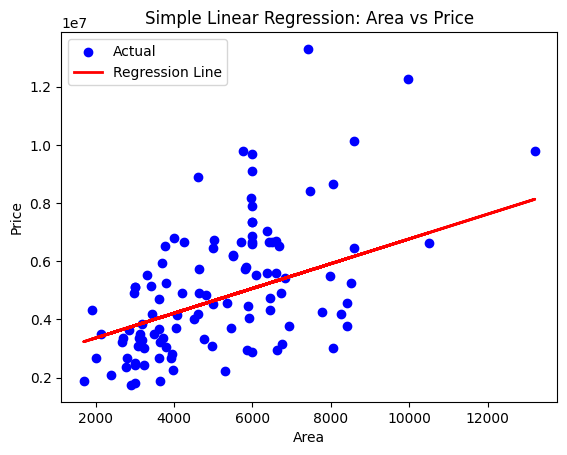

In [73]:
# Scatter plot of actual points
plt.scatter(X_test, y_test, color='blue', label='Actual')

# Regression line
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')

plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Simple Linear Regression: Area vs Price')
plt.legend()
plt.show()

The above model works, But it’s too simple (only area → price).
Let’s move to Multiple Linear Regression (using more features) — that should increase the R² score and improve predictions!

**Multiple Linear Regression:**

1. Choose Multiple Features

In [74]:
print(df.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


2. Preprocessing (Handle Categorical Variables)

In [75]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Check new columns
print(df_encoded.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


3. Select Features (X) and Target (y)

In [76]:
# Features: all except 'price'
X = df_encoded.drop('price', axis=1)

# Target: 'price'
y = df_encoded['price']

4. Split into Train and Test

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

5. Train the Model

In [79]:
# Create and Train Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

6. Predict and Evaluate

In [80]:
# Predict
y_pred = model.predict(X_test)

# Evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Absolute Error (MAE): 970043.4039201636
Mean Squared Error (MSE): 1754318687330.6638
R-squared (R²): 0.6529242642153184


 Interpretation of Results:

1. MAE -	₹970,043 -	On average, your model’s predictions are off by about ₹970k (way better than simple linear regression!).
2. MSE - 1,754,318,687,330 -	Lower than before — good. (Squared error, so naturally a large number.)
3. R² -	0.653 -	Now, 65% of the variation in house prices is explained by your model — way better than the 27% before!

7. Plotting Actual vs Predicted Scatter Plot

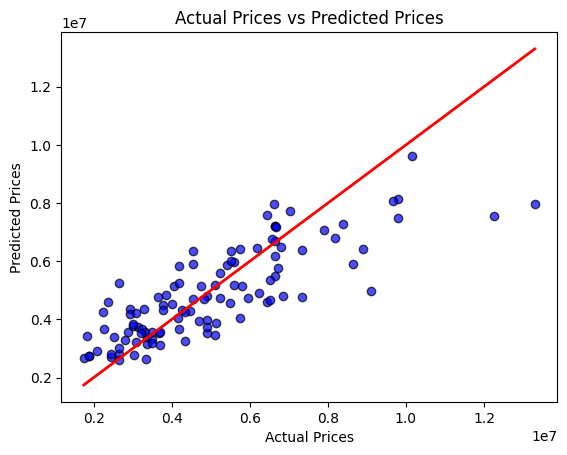

In [82]:
plt.scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) # Line for perfect prediction
plt.show()

What this plot shows:
1. Each point = one house.
2. If the prediction was perfect, points would lie exactly on the red line.
3. The closer the points are to the red line ➔ the better the model's predictions.

* Model coefficients

In [81]:
# Coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})
print(coefficients)

                            Feature   Coefficient
0                              area  2.359688e+02
1                          bedrooms  7.677870e+04
2                         bathrooms  1.094445e+06
3                           stories  4.074766e+05
4                           parking  2.248419e+05
5                      mainroad_yes  3.679199e+05
6                     guestroom_yes  2.316100e+05
7                      basement_yes  3.902512e+05
8               hotwaterheating_yes  6.846499e+05
9               airconditioning_yes  7.914267e+05
10                     prefarea_yes  6.298906e+05
11  furnishingstatus_semi-furnished -1.268818e+05
12     furnishingstatus_unfurnished -4.136451e+05
